# Notes:
# - This code is of poor quality
# - It is based on previous work and is prepared to run for an initial version
# - Several refactorings and clean-ups have to be done

#### Author: Jens Liebehenschel (2021)
#### Frankfurt University of Applied Sciences, FB2, Computer Science
#### For educational purposes only and not necessarily very pythonic
## Sorting an array using insertion sort
#### Based on Cormen et. al.: Introduction to Algorithms
## For execution of complete code click on "Kernel", then on "Restart & Run All"
## At the end of your experiments click on "File", then on "Close and Halt"

In [1]:
# steps: format[entry1, entry2, ... ]
# entry = [index, [sorted], [partially sorted], [unsorted], [compared elements], [exchanged elements], [array]]
# [sorted, partially sorted, unsorted]: [from,to], ... (with from <= to)
# [compared elements]: two indexes in a list
# [exchanged elements]: one (key assignment) or two indexes (key exchange) in a list
# [array]: in current state
# - only fill this list when global outputComparedElements == True

In [2]:
def insertion_sort(a):
    # the key is stored in an additional element at the end of the array
    # reason: understand comparison and exchanges in output
    a.append(-1)
    
    # nothing yet sorted
    steps.append([[], [], [[0,len(a)-2]], [], [], a[:]])
    # first element is already partially sorted
    steps.append([[], [[0,0]], [[1,len(a)-2]], [], [], a[:]])
    
    separation_graph_data.append([0,-1]) # starting point
    separation_graph_data.append([1,0]) # one element is always sorted
    
    for j in range(1, len(a)-1):
        # key is stored in a[-1] = a[numberOfElementsInList]
        a[numberOfElementsInList] = a[j]
        if outputExchangedElements:
            steps.append([[], [], [], [], [numberOfElementsInList], a[:]])

        i = j-1
        while i >= 0 and a[i] > a[numberOfElementsInList]:
            #
            if outputComparedElements:
                steps.append([[], [], [], [i,numberOfElementsInList], [], a[:]])

            a[i+1] = a[i]
            if outputExchangedElements:
                steps.append([[], [], [], [], [i+1], a[:]])

            i -= 1

        # key comparison check done in last condition check of for-loop?
        if i >= 0 and outputComparedElements:
            steps.append([[], [], [], [i,numberOfElementsInList], [], a[:]])

        a[i+1] = a[numberOfElementsInList]
        if outputExchangedElements:
            steps.append([[], [], [], [], [i+1], a[:]])
        #
        if j < len(a)-2:
            steps.append([[], [[0,j]], [[j+1,len(a)-2]], [], [], a[:]])
        else: # last loop: all elements sorted
            steps.append([[[0,j]], [], [[j+1,len(a)-2]], [], [], a[:]])

        separation_graph_data.append([len(steps),j])
    
    return a[:-1] # do not include additional space for key in returned array, so remove last element

## Constants

In [3]:
# The size of elements in tests can be changed here
ARRAY_SIZE = 10
# Some output text
TEXT_BEFORE_SORTING = "Before sorting:"
TEXT_AFTER_SORTING = "After  sorting:"

## Helper functions

In [4]:
def plot_values(x, y_vals, a):
    for y in y_vals:
        plt.text(x, y, a[y],verticalalignment='center_baseline', horizontalalignment='center', fontsize=14)

## Output graphical view

In [5]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 12]

def outputGraphicalView(numberOfElementsInList):
#    global steps
    global outputComparedElements

    # format graph
    plt.xticks(range(0, len(steps)+1, max(1,len(steps)//10)), fontsize=14)
    plt.yticks(range(0, numberOfElementsInList+1, max(1,numberOfElementsInList//10)), fontsize=14)
    plt.axis([-1, len(steps),-1, numberOfElementsInList+1])
    #plt.axis('off')
    plt.xlabel("Sorting steps")
    plt.ylabel("Indexes of array to be sorted")

    plotSeparationGraph = True

    # output graph based on data
    # todo: change to "for s in steps:"
    # remove index? probably necessary, or better use i,s = enumerate(steps)
    for i, step in enumerate(steps):
        if len(step[3]) == 0 and len(step[4]) == 0:
            # unsorted
            for j in range(len(step[2])):
                plt.plot([i,i],[step[2][j][0]-0.5, step[2][j][1]+1-0.5],'tomato',linewidth=8, solid_capstyle="butt")
            # partially sorted
            for j in range(len(step[1])):
                plt.plot([i,i],[step[1][j][0]-0.5, step[1][j][1]+1-0.5],'yellowgreen',linewidth=8, solid_capstyle="butt")
            # sorted
            for j in range(len(step[0])):
                plt.plot([i,i],[step[0][j][0]-0.5, step[0][j][1]+1-0.5],'mediumseagreen',linewidth=8, solid_capstyle="butt")

            # plot array content
            plot_values(i,list(range(numberOfElementsInList)),step[5])

        elif outputComparedElements and len(step[3]) > 0:
            minimum = min(step[3])
            maximum = max(step[3])
            # compared elements: assumption: two elements compared
            plt.plot([i,i],[minimum-0.5, minimum+1-0.5],'skyblue',linewidth=8, solid_capstyle="butt")
            plt.plot([i,i],[maximum-0.5, maximum+1-0.5],'skyblue',linewidth=8, solid_capstyle="butt")
            # plot keys
            plot_values(i,[minimum,maximum],step[5])
            # plot gray line between both elements
            if maximum-minimum > 1:
                plt.plot([i,i],[minimum+1-0.5, maximum-0.5],'skyblue')

        elif outputExchangedElements and len(step[4]) > 0:
            minimum = min(step[4])
            maximum = max(step[4])
            # exchanged elements: assumption: two elements exchanged, , also works for one (assignment)
            plt.plot([i,i],[minimum-0.5, minimum+1-0.5],'sandybrown',linewidth=8, solid_capstyle="butt")
            plt.plot([i,i],[maximum-0.5, maximum+1-0.5],'sandybrown',linewidth=8, solid_capstyle="butt")
            # plot keys
            plot_values(i,[minimum,maximum],step[5])
            # plot gray line between both elements
            if maximum-minimum > 1:
                plt.plot([i,i],[minimum+1-0.5, maximum-0.5],'sandybrown')
        
    #print(separation_graph_data)
    if plotSeparationGraph:
        for i in range(len(separation_graph_data)-1):
            plt.plot([separation_graph_data[i][0],separation_graph_data[i+1][0]],
                    [separation_graph_data[i][1]+0.5,separation_graph_data[i+1][1]+0.5],'bo-')

    # draw horitontal lines
    for i in range(numberOfElementsInList):
        plt.hlines(xmin=-1, xmax=len(steps), y=i-0.5, color="lightgray")
    plt.hlines(xmin=-1, xmax=len(steps), y=numberOfElementsInList-0.5, color="k")

    # show plot
    plt.show()

## Configuration data for elements in output 

In [6]:
# change settings here
plotSeparationGraph = False
plotSeparationGraph = True
outputComparedElements = False
outputComparedElements = True
outputExchangedElements = False
outputExchangedElements = True

## Size of predefined sorting tests

In [7]:
numberOfElementsInList = 10
ARRAY_SIZE = numberOfElementsInList

## Generate test data and test sorting algorithm

Before sorting: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
After  sorting: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


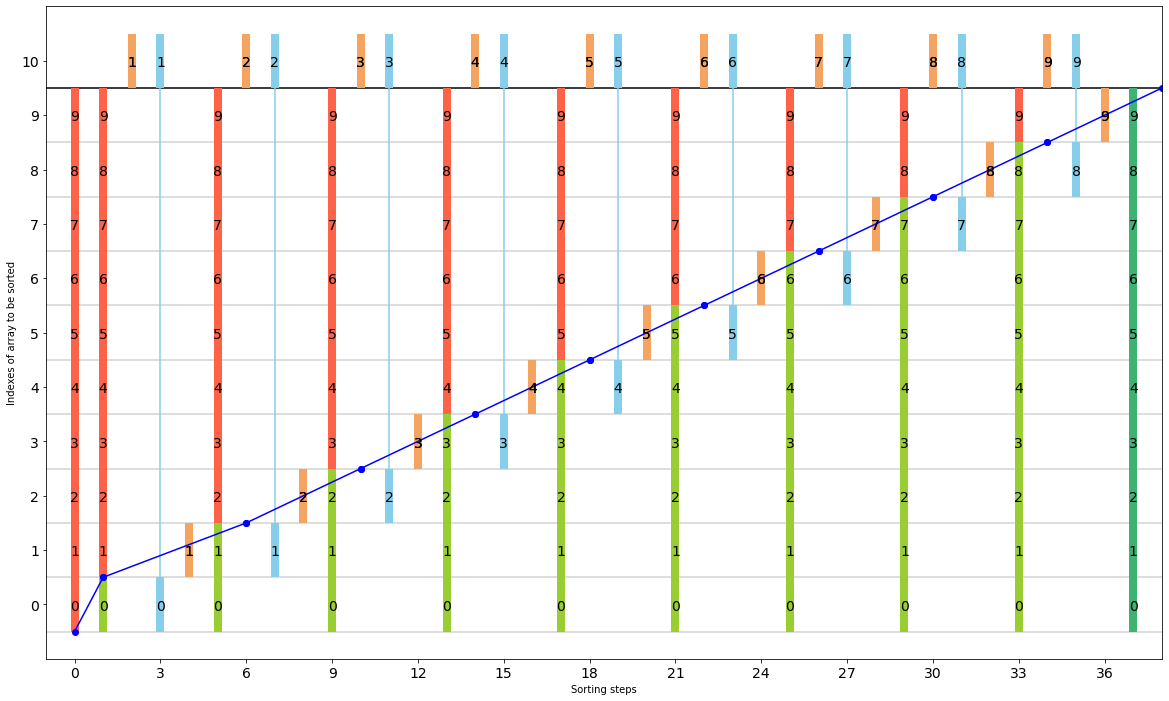

In [8]:
# test sorting sorted array
steps=[]
separation_graph_data=[]
sorted_array = list(range(ARRAY_SIZE))
print(TEXT_BEFORE_SORTING, sorted_array)
print(TEXT_AFTER_SORTING, insertion_sort(sorted_array))
outputGraphicalView(numberOfElementsInList)

Before sorting: [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
After  sorting: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


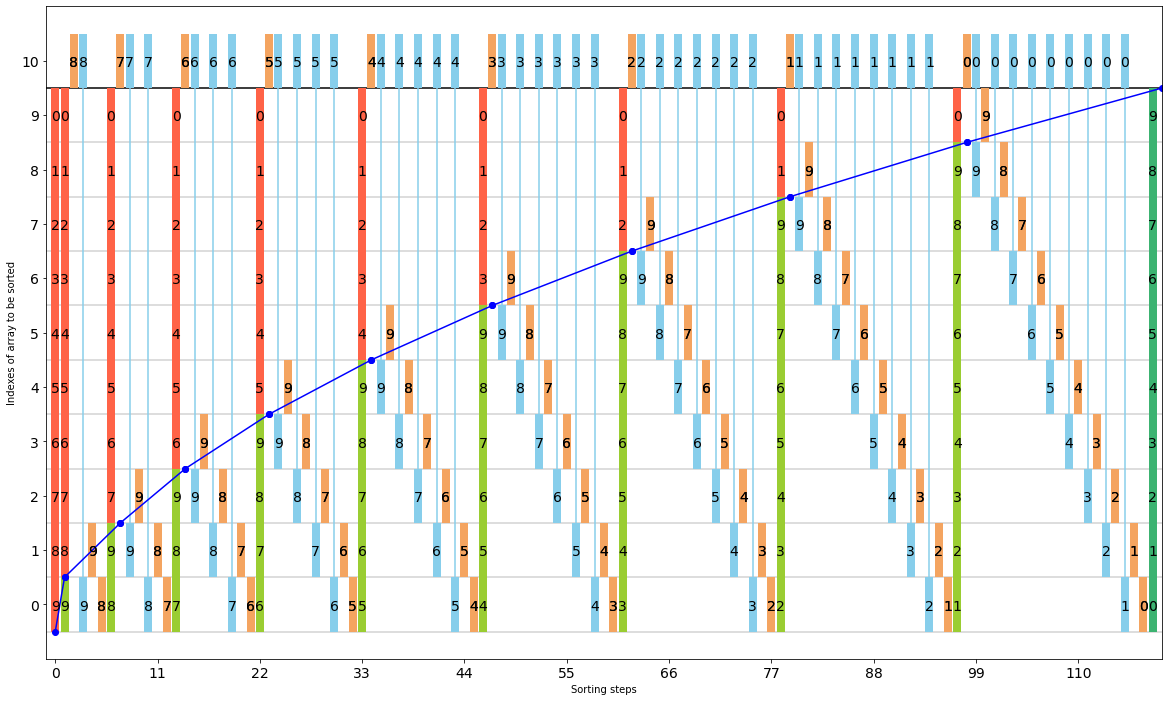

In [9]:
# test sorting reversly sorted array
steps=[]
separation_graph_data=[]
reverse_sorted_array = list(range(ARRAY_SIZE-1, -1, -1))
print(TEXT_BEFORE_SORTING, reverse_sorted_array)
print(TEXT_AFTER_SORTING, insertion_sort(reverse_sorted_array))
outputGraphicalView(numberOfElementsInList)

Before sorting: [2, 8, 4, 9, 1, 6, 7, 3, 0, 5]
After  sorting: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


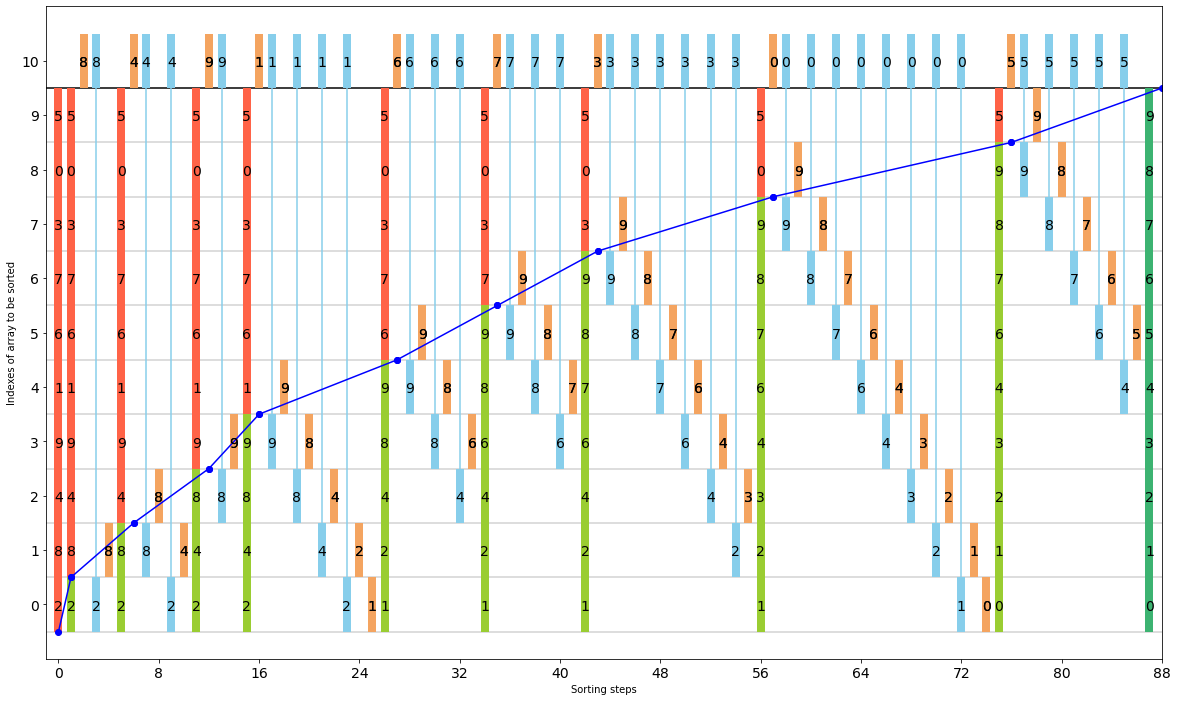

In [10]:
# test sorting random array
steps=[]
separation_graph_data=[]
# use numpy for generating a permutation
import numpy
# initialialize random number generator to obtain reproducable results
# other values might be used or even no initialization done here
numpy.random.seed(0)
# now generate random data and test sorting
array = list(numpy.random.permutation(ARRAY_SIZE))
print(TEXT_BEFORE_SORTING, array)
print(TEXT_AFTER_SORTING, insertion_sort(array))
outputGraphicalView(numberOfElementsInList)

Before sorting: [1, 3, 2]
After  sorting: [1, 2, 3]


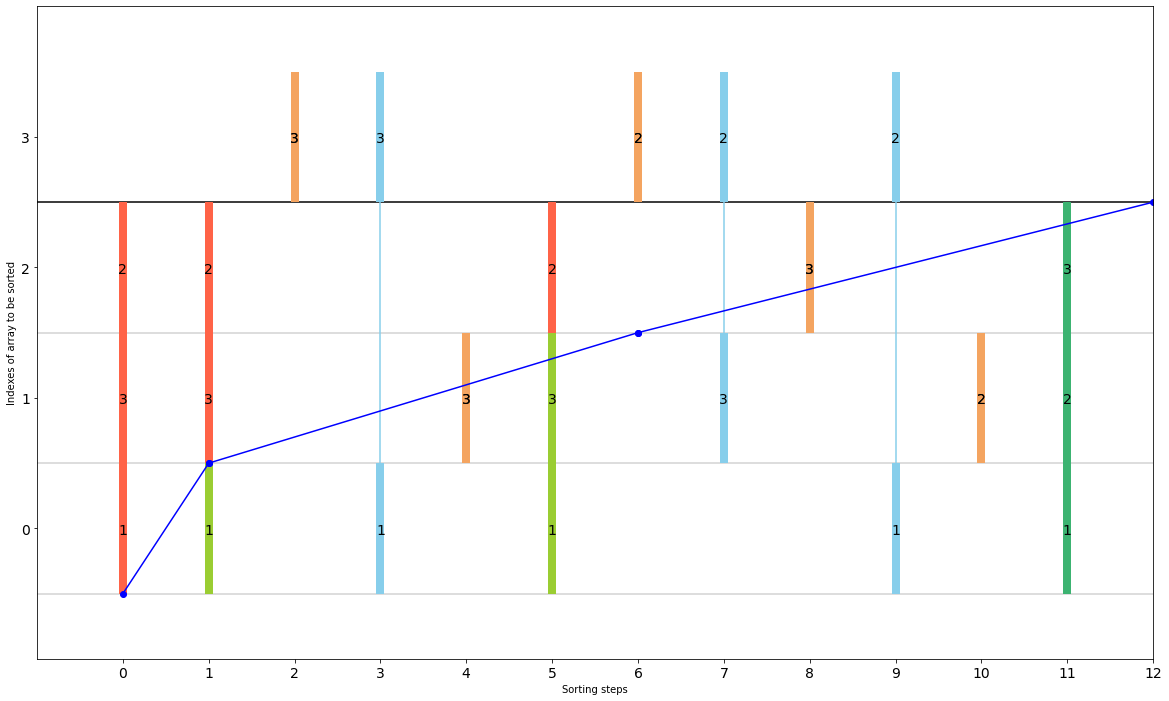

In [11]:
# your test here ...
steps=[]
separation_graph_data=[]
array = [1,3,2]
numberOfElementsInList = len(array)
print(TEXT_BEFORE_SORTING, array)
print(TEXT_AFTER_SORTING, insertion_sort(array))
outputGraphicalView(numberOfElementsInList)

In [12]:
# ... and here ...
